# titanic using MLP


## Load Libraries & CSVs

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#remoove warnings
import warnings
warnings.filterwarnings('ignore')


In [178]:
# load the data
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

#check the data
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
#drop the columns that are not useful for training
y = train_df['Survived']
train_df = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

In [180]:
train_df.shape

(891, 7)

In [181]:
df = train_df.copy()

In [182]:
 #checking for missing values
df.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [183]:
# filling the missing values with the mean of the column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [184]:
# chcecking for missing values again
df.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [185]:
df.shape

(891, 7)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [187]:
#encoding the categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [189]:
#scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns)

In [190]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954


In [191]:
X.shape

(891, 7)

In [192]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
# MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(150,50),
                    activation='relu',
                    max_iter=500,
                    random_state=42)
                    

mlp.fit(X_train, y_train)

print("Accuracy:", mlp.score(X_test, y_test))

Accuracy: 0.8156424581005587


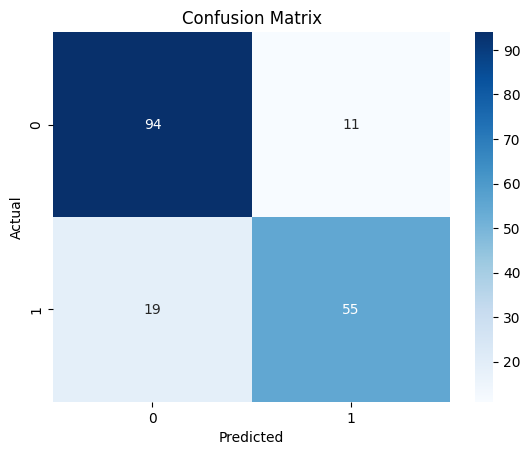

In [194]:
# visualze the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()